In [7]:
from IPython.display import HTML, Javascript, clear_output
import os
import sys

from google.colab import drive

drive.mount("/content/drive")

!pip install human_id

# Define the repo URL and folder name
REPO_URL = "https://github.com/rosinusserrano/autoencoding_experiments.git"
LOCAL_DIR = "/content/autoencoding_experiments"

# Inject a floating button with JavaScript
def inject_floating_button():
    display(HTML("""
    <script>
    function reloadRepo() {
        google.colab.kernel.invokeFunction('notebook.reload_repo', [], {});
    }
    const button = document.createElement('button');
    button.innerHTML = 'Reload Repo';
    button.style.position = 'fixed';
    button.style.bottom = '20px';
    button.style.right = '20px';
    button.style.backgroundColor = '#ff5050';
    button.style.color = 'white';
    button.style.border = 'none';
    button.style.padding = '10px 20px';
    button.style.borderRadius = '5px';
    button.style.boxShadow = '0px 4px 6px rgba(0,0,0,0.1)';
    button.style.cursor = 'pointer';
    button.onclick = reloadRepo;
    document.body.appendChild(button);
    </script>
    """))

def clone_and_import():
    # Clear output and display new button
    clear_output(wait=True)
    inject_floating_button()
    # Clone the repository if it doesn't exist
    if not os.path.exists(LOCAL_DIR):
        !git clone {REPO_URL} {LOCAL_DIR}
    else:
        # Pull the latest changes if the repo already exists
        !cd {LOCAL_DIR} && git pull

    # Append the repository to the system path
    if LOCAL_DIR not in sys.path:
        sys.path.append(LOCAL_DIR + "/src")
    print(f"Repository at '{LOCAL_DIR}' is ready for imports.")

# Register the Python function as a callable function for JavaScript
from google.colab import output
output.register_callback('notebook.reload_repo', clone_and_import)

# Inject the button
inject_floating_button()

# Initial setup
clone_and_import()

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0 (from 0)
Unpacking objects: 100% (5/5), 435 bytes | 435.00 KiB/s, done.
From https://github.com/rosinusserrano/autoencoding_experiments
   65a0b52..99f2b20  main       -> origin/main
Updating 65a0b52..99f2b20
Fast-forward
 src/experiments/vae_standard.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
Repository at '/content/autoencoding_experiments' is ready for imports.


In [15]:
%reload_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified
On device: cuda
EPOCH 0: train_loss 17.9702
EPOCH 0: val_loss 1.8497
EPOCH 0: test_loss 1.4698
EPOCH 1: train_loss 1.2905
EPOCH 1: val_loss 1.0075
EPOCH 1: test_loss 0.8412
EPOCH 2: train_loss 0.8046
EPOCH 2: val_loss 0.6895
EPOCH 2: test_loss 0.5718
EPOCH 3: train_loss 0.5906
EPOCH 3: val_loss 0.5224
EPOCH 3: test_loss 0.4392
EPOCH 4: train_loss 0.4689
EPOCH 4: val_loss 0.4314
EPOCH 4: test_loss 0.3618
EPOCH 5: train_loss 0.3920
EPOCH 5: val_loss 0.3606
EPOCH 5: test_loss 0.2861
EPOCH 6: train_loss 0.3354
EPOCH 6: val_loss 0.3113
EPOCH 6: test_loss 0.2531
EPOCH 7: train_loss 0.2953
EPOCH 7: val_loss 0.2823
EPOCH 7: test_loss 0.2327
EPOCH 8: train_loss 0.2610
EPOCH 8: val_loss 0.2502
EPOCH 8: test_loss 0.2091
EPOCH 9: train_loss 0.2369
EPOCH 9: val_loss 0.2285
EPOCH 9: test_loss 0.1829
EPOCH 10: train_loss 0.2172
EPOCH 10: val_loss 0.2095
EPOCH 10: test_loss 0.1630
EPOCH 11: train_loss 0.2010
EPOCH 11: val_loss

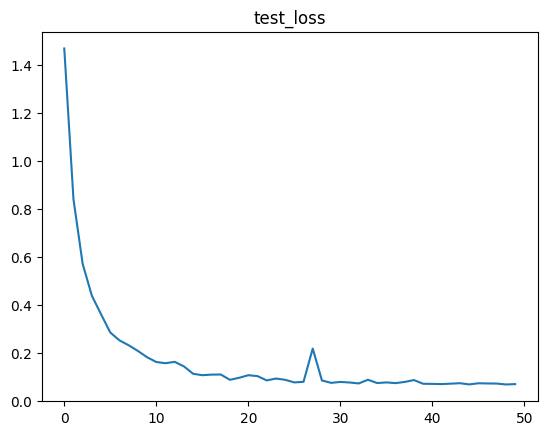

In [17]:
from models.vae import VAEConfig
from datasets import DatasetConfig
from utils.train import TrainConfig
from logger.caveman import CavemanLogger

from experiments.vae_standard import train_standard_vae_on_cifar


model_config = VAEConfig(latent_channels=256)
dataset_config = DatasetConfig(
    dataset_name="cifar10",
    validation_split=0.1,
    batch_size=128,
)
train_config = TrainConfig("adam", learning_rate=0.0003, n_epochs=50)

logger = CavemanLogger("/content/drive/MyDrive/Autoencoding Experiments/VAE on Cifar")

train_standard_vae_on_cifar(
    model_config=model_config,
    dataset_config=dataset_config,
    train_config=train_config,
    logger=logger,
    validation_interval=1,
    test_interval=1,
    visualization_interval=1,
)